In [ ]:
# Standard library imports
import random

# Third party imports
import numpy as np
import torch

# Sisal imports
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader
from sisal.plot import Plot

# Local imports
from synthetic_data import return_synthetic_data,plot_synthetic

# Synthetic data

In [ ]:
centroids, SNR, mask, mask_to_name = return_synthetic_data()
print('centroids = ',centroids.shape)
print('SNR : ', SNR.shape)
print('mask : ', mask.shape)

centroids =  (238428, 212)
SNR :  (238428,)
mask :  (238428,)


In [ ]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(centroids, mask, batch_size=32, alpha=SNR)

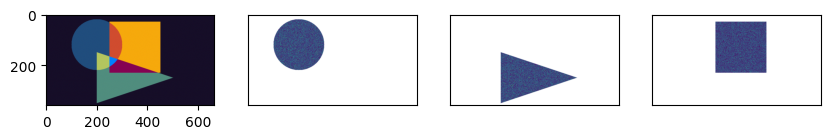

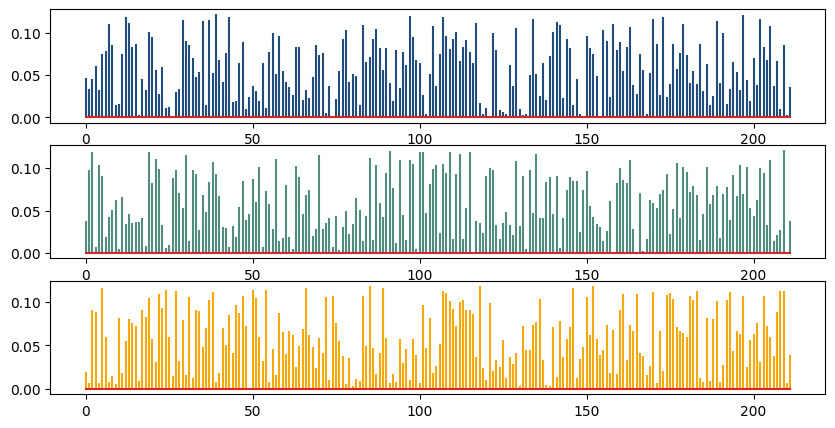

In [6]:
plot_synthetic()

## Arguments for the Beta VAE

In [ ]:
beta=4
z_dim=2
in_size = centroids.shape[1]
epochs=40
device ='cpu'
save_model_epochs=False
save_loss = False
train=True

In [8]:
# For reproducibility 

# Set a fixed seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  #Reproducibility across GPUs

# Deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Training SISAL model

In [ ]:
net = Solver(
    beta,
    z_dim,
    in_size,
    epochs,
    device,
    save_model_epochs,
    save_loss,
    train)

### Path where the model is saved

In [ ]:
model_filename = 'model_synthetic.pth'

In [ ]:
net.train(train_loader, test_loader, model_filename) 

Training model:  18%|█▊        | 7/40 [08:48<41:31, 75.51s/epoch]


PosixPath('model_synthetic.pth')

In [ ]:
p = Plot(model_filename, device, train_loader, test_loader, full_index_loader)

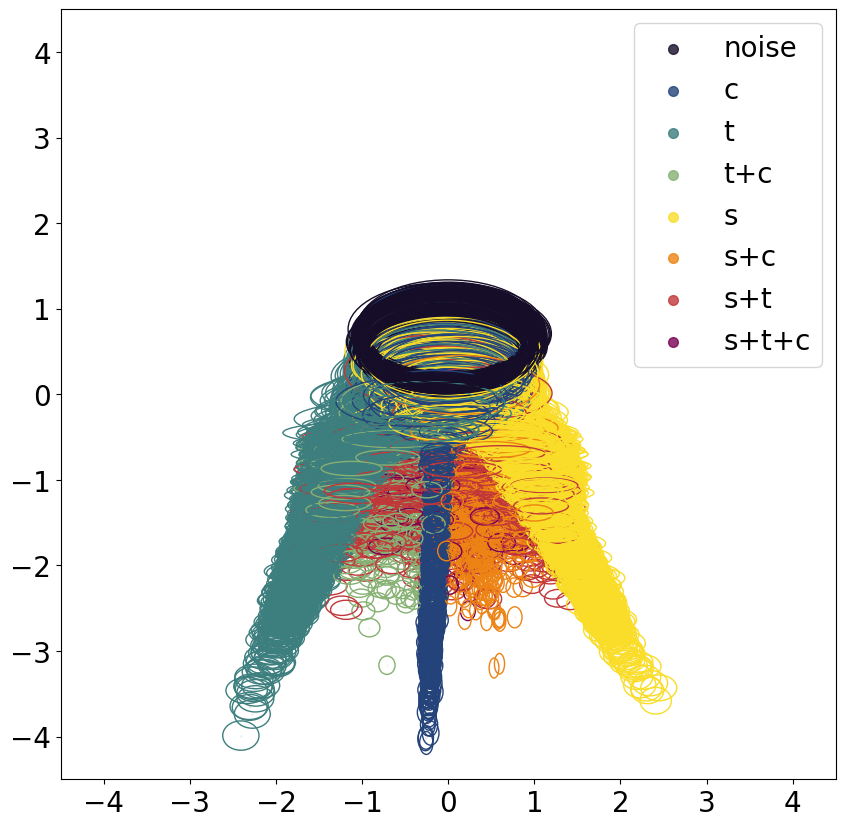

In [14]:
p.plot_latent_dim_with_var(mask_to_name,p=0.2)

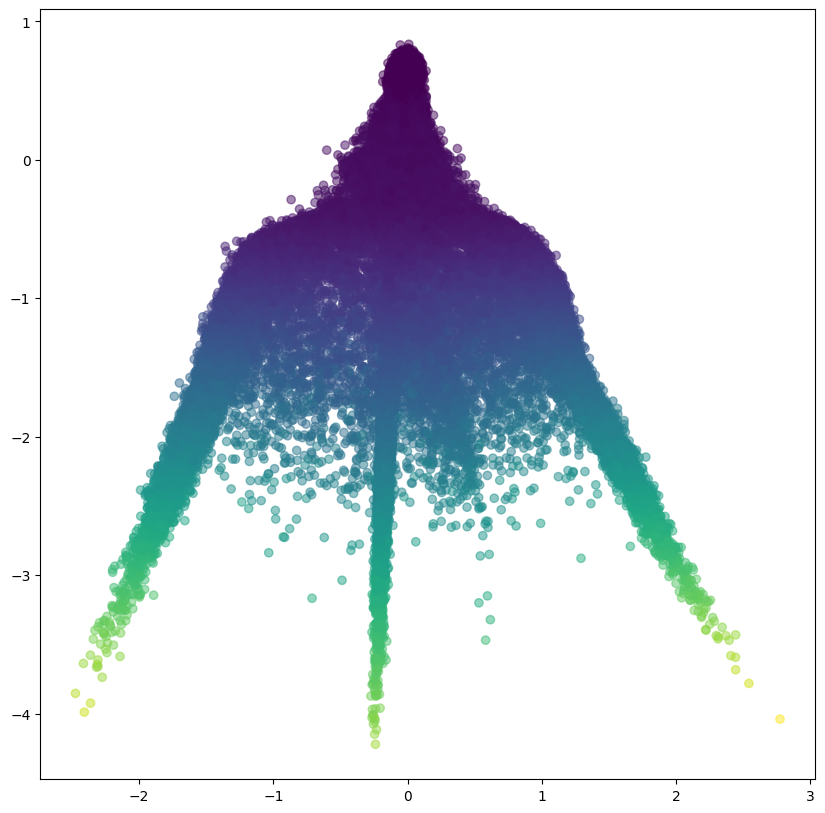

In [15]:
p.plot_latent_dim_coeff(p=0.7)  